<a href="https://colab.research.google.com/github/evanreppeto/AIProject/blob/main/Copy_of_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
import cv2
from tensorflow. keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow. keras.models import Sequential
from tensorflow. keras.models import load_model
from tensorflow. keras.optimizers import Adam, SGD

<ipython-input-2-a582af57eb5d>:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/AI Project Data (Merged)')
data_iterator = Data.as_numpy_iterator()
batch = data_iterator.next()

Found 3723 files belonging to 8 classes.


In [6]:
#normalizing orparation
Data = Data.map(lambda x,y: (x/255, y))

#split the data set(75:15:10)
train_size = int(len(Data)*.75)
val_size = int(len(Data)*.15)
test_size = int(len(Data)*.1)

train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

train_datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=20,
     zoom_range=0.15,
     horizontal_flip=True
 )

model = Sequential([
base_model,
GlobalAveragePooling2D(),
Dense(258, activation='relu'),
Dense(256, activation='relu'),
Dense(8, activation='softmax')

])
opt = SGD(learning_rate=0.001, momentum = 0.9)
model.compile(optimizer=opt, loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 258)            │       132,354 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        66,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,915,402 (56.90 MB)

 Trainable params: 14,915,402 (56.90 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import datetime
import tensorflow as tf

logdir = 'Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

total_epochs = 25
save_interval = 5

for epoch in range(0, total_epochs, save_interval):
    print("Training epochs " + str(epoch + 1) + " to " + str(epoch + save_interval) + "...")

    # Train in blocks of 10 epochs
    hist = model.fit(
        train,
        initial_epoch=epoch,
        epochs=epoch + save_interval,
        validation_data=val,
        callbacks=[tensorboard_callback]
    )

    # Save the model after every 10 epochs
    date_stamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = "/content/drive/MyDrive/New Data/model_epoch" + str(epoch + save_interval) + "_" + date_stamp + ".h5"
    model.save(file_name)
    print("Model saved at epoch " + str(epoch + save_interval) + ": " + file_name)






Training epochs 1 to 5...
Epoch 1/5


KeyboardInterrupt: 

In [16]:
import datetime
import tensorflow as tf

logdir = 'Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

full_loss = []
full_val_loss = []
full_acc = []
full_val_acc = []

total_epochs = 50
save_interval = 10

for epoch in range(0, total_epochs, save_interval):
    print(f"Training epochs {epoch + 1} to {epoch + save_interval}...")

    hist = model.fit(
        train,
        initial_epoch=epoch,
        epochs=epoch + save_interval,
        validation_data=val,
        callbacks=[tensorboard_callback]
    )

    # Save history metrics
    full_loss.extend(hist.history['loss'])
    full_val_loss.extend(hist.history['val_loss'])
    full_acc.extend(hist.history['accuracy'])
    full_val_acc.extend(hist.history['val_accuracy'])

    # Save model
    date_stamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = f"/content/drive/MyDrive/New Data/model_epoch{epoch + save_interval}_{date_stamp}.h5"
    model.save(file_name)
    print(f"Model saved at epoch {epoch + save_interval}: {file_name}")

Training epochs 1 to 10...
Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 69s 750ms/step - accuracy: 0.1817 - loss: 1.9846 - val_accuracy: 0.2426 - val_loss: 1.9025
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 64s 736ms/step - accuracy: 0.2639 - loss: 1.8599 - val_accuracy: 0.2445 - val_loss: 1.8821
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 91s 846ms/step - accuracy: 0.3224 - loss: 1.7562 - val_accuracy: 0.3364 - val_loss: 1.6989
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.3949 - loss: 1.6318

KeyboardInterrupt: 

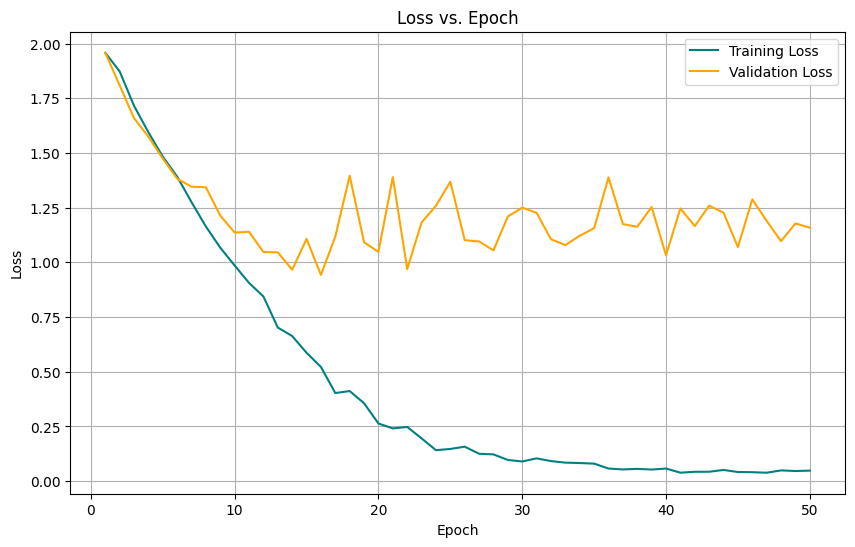

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(full_loss)+1), full_loss, label='Training Loss', color='teal')
plt.plot(range(1, len(full_val_loss)+1), full_val_loss, label='Validation Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend()
plt.grid(True)
plt.show()

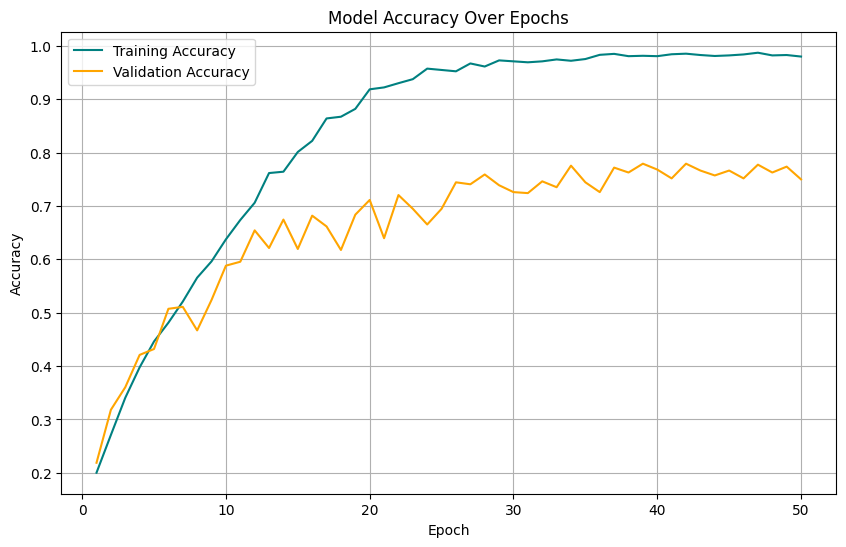

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(full_acc) + 1)

# Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, full_acc, label='Training Accuracy', color='teal')
plt.plot(epochs, full_val_acc, label='Validation Accuracy', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
new_model = load_model('/content/drive/MyDrive/New Data/model_epoch25_2025-04-14_02-16-46.h5')

In [7]:
#Plotting loss
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

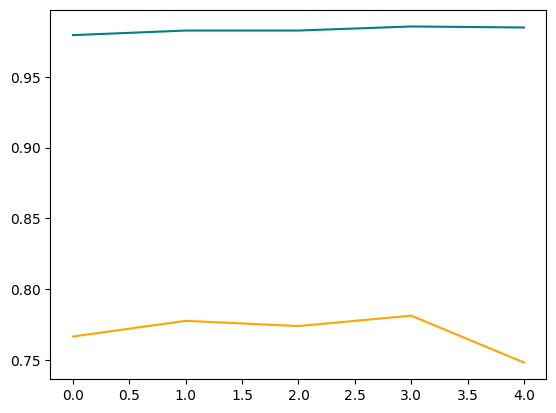

In [ ]:
#plot accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()  # Use CategoricalAccuracy for multi-class

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = new_model.predict(X)

    # Convert y to one-hot encoding for CategoricalAccuracy
    y = tf.keras.utils.to_categorical(y, num_classes=8)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Precision: 0.6880734
Recall: 0.63920456
Accuracy: 0.6448864


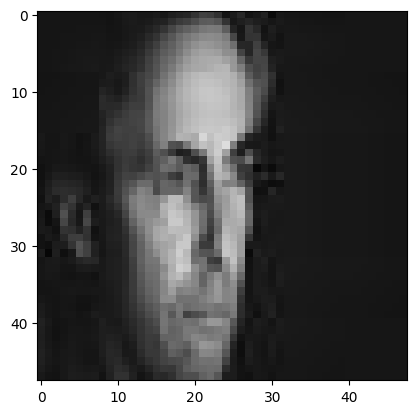

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[2.1755699e-02 3.2303942e-05 1.7809242e-04 5.7618339e-03 1.1631999e-03
  1.5536498e-03 9.6703523e-01 2.5200276e-03]]
Sadness


In [ ]:
#testing pipeline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr
test_img = cv2.imread('/content/drive/MyDrive/AI Project Data/sadness/621462.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

test_img = cv2.resize(test_img, (256,256))
test_img = test_img/255.0
test_img = np.expand_dims(test_img, 0)
test_predicton = model.predict(test_img)

print(test_predicton)
if np.argmax(test_predicton) == 0:
  print('Anger')
elif np.argmax(test_predicton) == 1:
  print('Contempt')
elif np.argmax(test_predicton) == 2:
  print('Disgust')
elif np.argmax(test_predicton) == 3:
  print('Fear')
elif np.argmax(test_predicton) == 4:
  print('Happy')
elif np.argmax(test_predicton) == 5:
  print('Neutral')
elif np.argmax(test_predicton) == 6:
  print('Sadness')
elif np.argmax(test_predicton) == 7:
  print('Surprise')